# HR Analytics - Why do employees leave?

# Table of Contents

1. Background
2. Problem 
3. Hypothesis
4. Machine Learning Models   
     a. Import     
     b. EDA  
     c. KNN   
     d. Decision Tree   
     e. KNN (Cont.)    
5. Conclusion
6. Appendix



# Background

Kaggle Data: https://www.kaggle.com/ludobenistant/hr-analytics

This project analyzes a simulated data set on why experienced employees leave. My goal is to try and predict if an employee will leave and to understand which features have the highest impact.

Fields in the dataset include:

1) Satisfaction Level: Level of happiness at work. (1 = highest, 0 = lowest)

2) Last Evaluation: Time that has past since the employee's last evaluation.

3) Number of Projects: The number of projects an employee worked in during their tenure.

4) Average Monthly Hours: On average, the number of hours an employee works a month.

5) Time Spend with the Company: The number of years the employee was with their employer.

6) Work Accident: Shows if the employee had a work related accident. (1 = yes, 0 = no)

7) Left: Whether the employee left the company. (1 = yes, 0 = no)

8) Promotion within the last 5 years: Whether or not an employee was promoted within the past five years.

9) Department: The division the employee works in.

10) Salary: Categorical level of how much an employee is paid. (low, medium, high)


# Problem

For every employer, they want to ensure that they retain their employees for various reasons. Replacing a current employee would not only take time and resources, but the employer loses the institutional knowledge that has been placed in their employee for however long he/she worked for them. According to the Bureau of Labor Statistics, 5.2 million people separate from their jobs every month. Using different machine learning methods, I will try to answer the question: Why do employees leave?

Reference: https://www.bls.gov/news.release/jolts.t09.htm

# Hypothesis

There are a few features that will directly correlate to why an employee quits his/her job. I believe it will predominantly be based on their satisfaction level, hours worked, and time spent at the company.

# Machine Learning Models

In [306]:
#a. Import Libraries

In [448]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
from subprocess import check_output

from sklearn import preprocessing, neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn import tree, ensemble, metrics, model_selection, externals

In [449]:
#Import the dataset

df = pd.read_csv('HR_Data.csv')

In [408]:
#Validate dataframe

df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [310]:
#b. EDA

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [312]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [313]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [314]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [315]:
#Breakdown of salary

df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [316]:
#Breakdown of departments

df['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [467]:
#Convert sales to numeric

df['sales'].replace(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
        'IT', 'product_mng', 'marketing', 'RandD'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], inplace = True)

In [468]:
#Convert salary to numeric

df['salary'].replace(['low', 'medium', 'high'], [0, 1, 2], inplace = True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.015413,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.011855,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.005577,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002387,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.001611,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.019215,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.043814,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.015170,0.098119
sales,0.015413,0.011855,0.005577,-0.002387,-0.001611,0.019215,-0.043814,0.015170,1.000000,0.033415
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,0.033415,1.000000


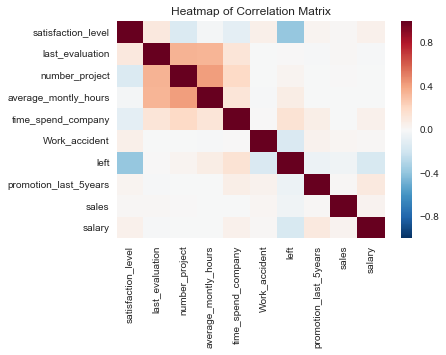

In [319]:
#Correlation Matrix

corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')
corr

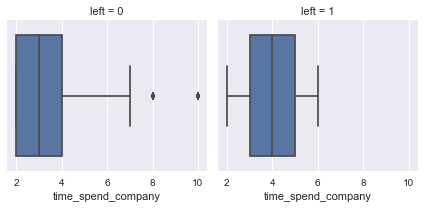

In [320]:
#Check for outliers

g = sns.FacetGrid(df, col = 'left')
g.map(sns.boxplot, 'time_spend_company')

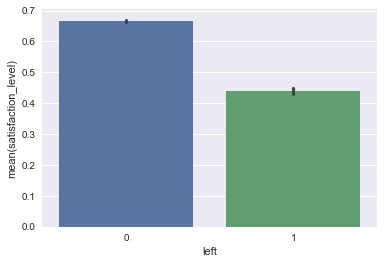

In [321]:
#Comparing left to satisfaction level

sns.barplot(df['left'],df['satisfaction_level'])

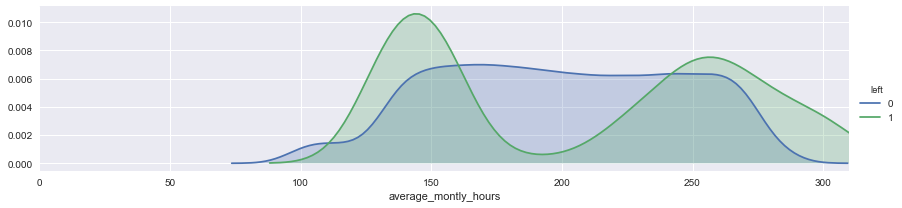

In [322]:
#average_monthly_hours

g = sns.FacetGrid(df, hue="left",aspect=4)
g.map(sns.kdeplot,'average_montly_hours',shade= True)
g.set(xlim=(0, df['average_montly_hours'].max()))
g.add_legend()

(207.41921030523662, 199.0602030101505)

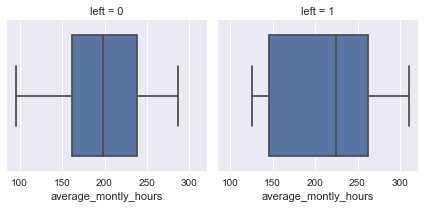

In [323]:
#Boxplot

g = sns.FacetGrid(df, col = 'left')
g.map(sns.boxplot, 'average_montly_hours')
np.mean(df[df['left']==1]['average_montly_hours']),np.mean(df[df['left']==0]['average_montly_hours'])

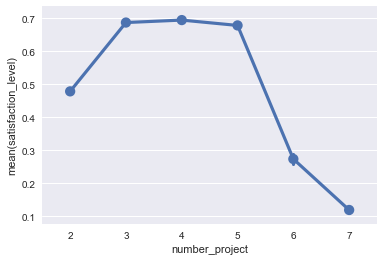

In [324]:
#Number of Projects and Satisfaction

sns.pointplot(df['number_project'],df['satisfaction_level'])

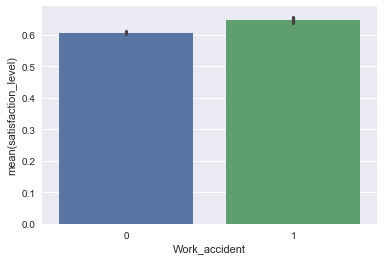

In [325]:
#Work Accident and Satisfaction

sns.barplot(df['Work_accident'],df['satisfaction_level'])

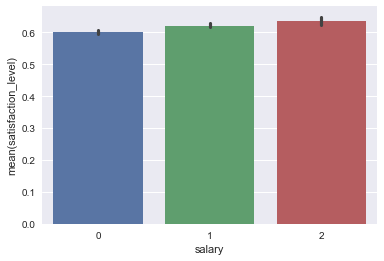

In [326]:
#Salary and satisfaction

sns.barplot(df['salary'],df['satisfaction_level'])

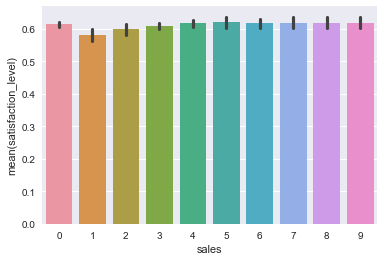

In [327]:
#Job and satisfaction

sns.barplot(df['sales'],df['satisfaction_level'])

In [328]:
#Range of averge monthly hours and who left

df['avg_mon_hours_range'] = pd.cut(df['average_montly_hours'], 3)
df[['avg_mon_hours_range', 'left']].groupby(['avg_mon_hours_range']).mean()

,left
avg_mon_hours_range,
"(95.786, 167.333]",0.326489
"(167.333, 238.667]",0.070913
"(238.667, 310.0]",0.355242


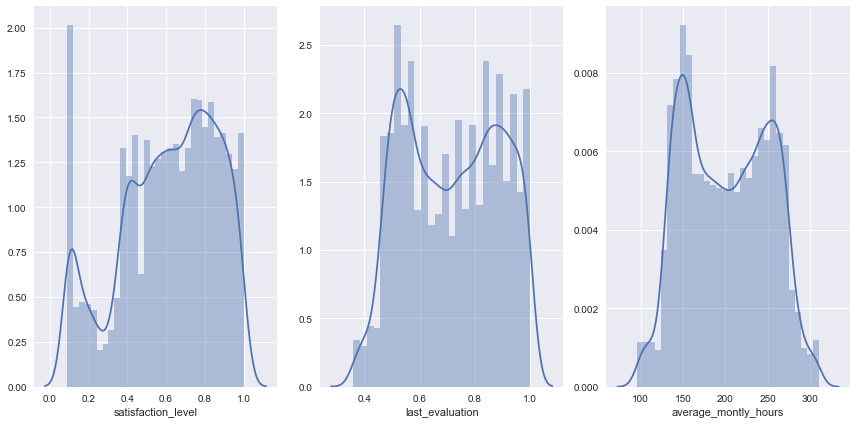

In [329]:
fig, axs = plt.subplots(ncols=3,figsize=(12,6))
sns.distplot(df["satisfaction_level"], ax=axs[0])
sns.distplot(df["last_evaluation"], ax=axs[1])
sns.distplot(df["average_montly_hours"], ax=axs[2])
plt.tight_layout()
plt.show()
plt.gcf().clear()

In [330]:
#How many employees left and stayed
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [537]:
#Null Accuracy Score - 68% of people stay
3571.0 / 11428

0.31247812390619534

# C. KNN Model

In [652]:
columns_X = ['satisfaction_level', 'number_project', 'average_montly_hours']
X = df[columns_X]

scaler = preprocessing.MinMaxScaler().fit(X)

X = scaler.transform(X)

In [653]:
X

array([[ 0.31868132,  0.        ,  0.28504673],
       [ 0.78021978,  0.6       ,  0.77570093],
       [ 0.02197802,  1.        ,  0.82242991],
       ..., 
       [ 0.30769231,  0.        ,  0.21962617],
       [ 0.02197802,  0.8       ,  0.85981308],
       [ 0.30769231,  0.        ,  0.28971963]])

In [654]:
type(X)

numpy.ndarray

In [655]:
X.shape

(14999, 3)

In [656]:
c = df.left

In [642]:
c

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [657]:
model = neighbors.KNeighborsClassifier(n_neighbors = 9).\
    fit(X, c) 

In [658]:
#Fitted from original dataset

model.score(X, c)

0.9425961730782052

# Train | Test | Split

In [659]:
train_df = df.sample(frac = .8, random_state = 0).sort_index()

In [660]:
train_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
14993,0.76,0.83,6,293,6,0,1,0,4,0
14994,0.40,0.57,2,151,3,0,1,0,4,0
14995,0.37,0.48,2,160,3,0,1,0,4,0
14997,0.11,0.96,6,280,4,0,1,0,4,0


In [661]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, c, random_state=1)


In [662]:
# KNN accuracy on original data 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

0.931733333333


In [663]:
# Graph the accuracy of a few values of K
scores = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, y)
    scores.append(knn.score(X, y))
    
scores

[0.98553236882458828,
 0.97159810654043599,
 0.96779785319021272,
 0.96266417761184075,
 0.95673044869657975,
 0.94972998199879988,
 0.94812987532502169,
 0.94619641309420632,
 0.9425961730782052,
 0.94152943529568633,
 0.94032935529035266,
 0.93832922194812984,
 0.93566237749183279,
 0.93552903526901798,
 0.93639575971731448,
 0.93446229748649912,
 0.93359557303820251,
 0.93126208413894263,
 0.93192879525301686,
 0.93272884858990601,
 0.93239549303286884,
 0.93192879525301686,
 0.93132875525034997,
 0.93179545303020206,
 0.93159543969597969,
 0.93212880858723912,
 0.93079538635909065,
 0.93086205747049799,
 0.93106207080472037]

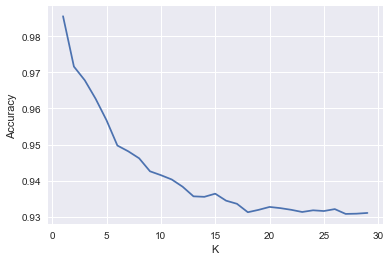

In [664]:
#Accuracy decreases as more neighbors are added - want to get it at the elbow, balance overfit and accuracy to give a bigger generalization of the data

plt.plot(range(1,30), scores)
plt.ylabel("Accuracy")
plt.xlabel("K")

In [665]:
#Cross Validation
knn = KNeighborsClassifier(n_neighbors=3)
cross_val_score(knn, X, c, cv=5, scoring='accuracy').mean()

0.94119768588122432

In [666]:
#Add salary to model

columns_X = ['satisfaction_level', 'number_project', 'average_montly_hours', 'salary']
X = df[columns_X]

scaler = preprocessing.MinMaxScaler().fit(X)

X = scaler.transform(X)

In [667]:
X.shape

(14999, 4)

In [668]:
c = df.left

In [669]:
c

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [670]:
model = neighbors.KNeighborsClassifier(n_neighbors = 9).\
    fit(X, c) 

In [671]:
#Fitted from original dataset with salary

model.score(X, c)

0.93939595973064871

# Train | Test | Split (with Salary)

In [672]:
train_df = df.sample(frac = .8, random_state = 0).sort_index()

In [673]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, c, random_state=1)

In [674]:
# KNN accuracy on original data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

0.928533333333


In [675]:
#Cross Validation
knn = KNeighborsClassifier(n_neighbors=3)
cross_val_score(knn, X, c, cv=5, scoring='accuracy').mean()

0.94079730808118234

In [676]:
#Confusion Matrix - Visual of Cross Validation Score

from nltk import ConfusionMatrix 

print ConfusionMatrix(list(y_test), list(y_pred_class))

  |    0    1 |
--+-----------+
0 |<2693> 160 |
1 |  108 <789>|
--+-----------+
(row = reference; col = test)



# D. Decision Tree Model

In [677]:
%load_ext gvmagic

The gvmagic extension is already loaded. To reload it, use:
  %reload_ext gvmagic


In [678]:
df.columns

Index([u'satisfaction_level', u'last_evaluation', u'number_project',
       u'average_montly_hours', u'time_spend_company', u'Work_accident',
       u'left', u'promotion_last_5years', u'sales', u'salary'],
      dtype='object')

In [679]:
X = df[df.columns.values]
X.drop(['left'], axis = 1, inplace = True)
y = df['left']

In [680]:
X.shape

(14999, 9)

In [681]:
y = df['left']

In [682]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [683]:
train_X, test_X, train_y, test_y = model_selection.train_test_split(X, y, train_size = .6, random_state = 0)

In [684]:
model = tree.DecisionTreeRegressor(random_state = 0).\
    fit(train_X, train_y)

In [685]:
train_y_hat = model.predict(train_X)
print np.sqrt(metrics.mean_squared_error(train_y, train_y_hat))

test_y_hat = model.predict(test_X)
print np.sqrt(metrics.mean_squared_error(test_y, test_y_hat))

0.0
0.165327956902


In [686]:
model = tree.DecisionTreeRegressor(max_depth = 4, random_state = 0).\
    fit(train_X, train_y)

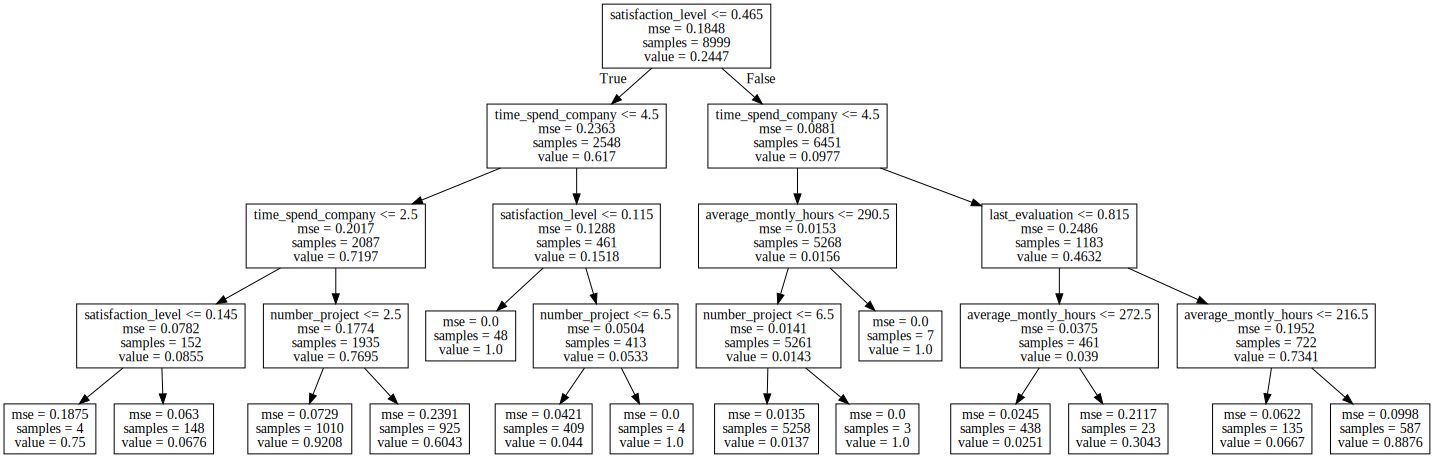

In [687]:
dot_data = externals.six.StringIO()
tree.export_graphviz(model, out_file = dot_data, feature_names = X.columns)
%dotstr dot_data.getvalue()

In [688]:
sorted(zip(model.feature_importances_, X.columns.values), reverse = True)

[(0.44878514532517805, 'satisfaction_level'),
 (0.32109294420561602, 'time_spend_company'),
 (0.11445471049369017, 'last_evaluation'),
 (0.069441192343460939, 'average_montly_hours'),
 (0.046226007632054859, 'number_project'),
 (0.0, 'sales'),
 (0.0, 'salary'),
 (0.0, 'promotion_last_5years'),
 (0.0, 'Work_accident')]

In [689]:
score = cross_val_score(tree.DecisionTreeRegressor(), X, c, cv=5, scoring='neg_mean_squared_error').mean()
#cross_val_score(tree.DecisionTreeRegressor(), X, c, cv=5, scoring='neg_mean_squared_error').mean()

In [690]:
#Root Mean Square Error

np.sqrt(-score)

0.14854853303438129

# E. KNN (Cont.)

In [691]:
#Updated features based on decision tree

columns_X = ['satisfaction_level', 'time_spend_company', 'last_evaluation']
X = df[columns_X]

scaler = preprocessing.MinMaxScaler().fit(X)

X = scaler.transform(X)


In [692]:
X

array([[ 0.31868132,  0.125     ,  0.265625  ],
       [ 0.78021978,  0.5       ,  0.78125   ],
       [ 0.02197802,  0.25      ,  0.8125    ],
       ..., 
       [ 0.30769231,  0.125     ,  0.265625  ],
       [ 0.02197802,  0.25      ,  0.9375    ],
       [ 0.30769231,  0.125     ,  0.25      ]])

In [693]:
type(X)

numpy.ndarray

In [694]:
X.shape

(14999, 3)

In [695]:
c = df.left

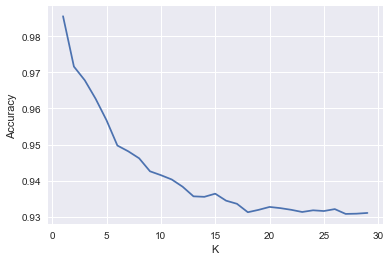

In [696]:
#Accuracy decreases as more neighbors are added - want to get it at the elbow, balance overfit and accuracy to give a bigger generalization of the data

plt.plot(range(1,30), scores)
plt.ylabel("Accuracy")
plt.xlabel("K")

In [697]:
#Based on accuracy and k neighbors plot, 9 is still the elbow of the graph

model = neighbors.KNeighborsClassifier(n_neighbors = 9).\
    fit(X, c) 

In [698]:
#Fitted from original dataset

model.score(X, c)

0.96833122208147204

# Train | Test | Split (New Model)

In [699]:
train_df = df.sample(frac = .8, random_state = 0).sort_index()

In [700]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, c, random_state=1)

In [701]:
# KNN accuracy on original data 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

0.9632


In [705]:
# Graph the accuracy of a few values of K
scores = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, y)
    scores.append(knn.score(X, y))
    
scores

[0.98499899993332884,
 0.97873191546103078,
 0.98106540436029066,
 0.97906527101806784,
 0.97546503100206683,
 0.97033135542369486,
 0.96913127541836119,
 0.96933128875258345,
 0.96833122208147204,
 0.96893126208413893,
 0.96799786652443498,
 0.96719781318754583,
 0.96699779985332357,
 0.96733115541036074,
 0.96619774651643442,
 0.96646443096206414,
 0.96586439095939725,
 0.96606440429361962,
 0.96453096873124877,
 0.96473098206547103,
 0.96439762650843386,
 0.96446429761984132,
 0.96346423094872991,
 0.96353090206013736,
 0.96266417761184075,
 0.96293086205747047,
 0.96226415094339623,
 0.96253083538902595,
 0.96226415094339623]

In [703]:
#Cross Validation
knn = KNeighborsClassifier(n_neighbors=3)
cross_val_score(knn, X, c, cv=5, scoring='accuracy').mean()

0.96686468713311347

(array([ 2466.,   279.,    79.,    27.,    11.,     4.,    19.,    31.,
          108.,   726.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

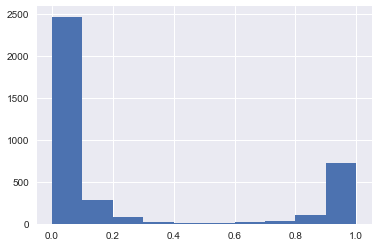

In [716]:
#Probability of predictions from X_test data

probs = knn.predict_proba(X_test)[:, 1]
plt.hist(probs)

In [725]:
#Updated Confusion Matrix - Visual of Cross Validation Score

from nltk import ConfusionMatrix 
preds = np.where(probs > .1, 1, 0)
print ConfusionMatrix(list(y_test), list(preds))

  |    0    1 |
--+-----------+
0 |<2450> 403 |
1 |   16 <881>|
--+-----------+
(row = reference; col = test)



#ROC Curve

fpr, tpr, thresholds = metrics.roc_curve(y_test, probs) 
plt.plot(fpr, tpr) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('False Positive Rate (1 - Specificity)') 
plt.ylabel('True Positive Rate (Sensitivity)')

# Conclusion

Next Steps

Gini Index - Evaluation of Decision Tree

# Appendix

# Assumptions

The data from my sample are representative of all workers and companies.

The data corresponds across various factors. Example is that salary levels at companies vary depending on the industry and role. However, I am making the assumption that the level that was chosen for this data set works across all companies.